In [7]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (12,12)

In [8]:
# def crop(img, ax0_min, ax0_max, ax1_min, ax1_max):
#     ax0_size = ax0_max - ax0_min
#     ax1_size = ax1_max - ax1_min
#     ax0_start = int(max(0, ax0_min - ax0_size*2))
#     ax1_start = int(max(0, ax1_min - ax1_size*2))
#     cropped = img[ax0_start: ax0_start + ax0_size *
#                   5, ax1_start: ax1_start + ax1_size*5]

In [9]:
filename = '../csv_detection_info/21_0, god kvalitet.csv'
filename_clean = '../csv_detection_info_clean/21_0, god kvalitet.csv'
saved_cropped_image = '//nmbu.no/LargeFile/Project/CubiAI/preprocess/cropped/21/0, god kvalitet'

In [20]:
'1.2.840.114387.352850473.58992.18859.36976.254953633839080.dcm.npy' in detection_df['filename'].values

False

In [18]:
detection_df.values

array([['//nmbu.no/LargeFile/Project/CubiAI/sortering/dicom sortert level 2',
        '1.2.276.0.7230010.3.0.3.5.1.12024535.3459604252.dcm', 790, ...,
        21, 0, '0 god kvalitet'],
       ['//nmbu.no/LargeFile/Project/CubiAI/sortering/dicom sortert level 2',
        '1.2.276.0.7230010.3.0.3.5.1.12024538.3671589342.dcm', 927, ...,
        21, 0, '0 god kvalitet'],
       ['//nmbu.no/LargeFile/Project/CubiAI/sortering/dicom sortert level 2',
        '1.2.276.0.95.17020.20210114.161547.0.0.dcm', 340, ..., 21, 0,
        '0 god kvalitet'],
       ...,
       ['//nmbu.no/LargeFile/Project/CubiAI/sortering/dicom sortert level 2',
        '1.3.51.0.7.947566075.56141.24654.43724.55043.54456.34131.dcm',
        761, ..., 21, 0, '0 god kvalitet'],
       ['//nmbu.no/LargeFile/Project/CubiAI/sortering/dicom sortert level 2',
        '1.3.51.0.7.961243608.47489.1612.40227.26278.58115.24054.dcm',
        634, ..., 21, 0, '0 god kvalitet'],
       ['//nmbu.no/LargeFile/Project/CubiAI/sortering/d

In [10]:
detection_df = pd.read_csv(filename)

In [11]:
detection_df

base_path  \
0    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
1    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
2    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
3    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
4    //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
..                                                 ...   
220  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
221  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
222  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
223  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   
224  //nmbu.no/LargeFile/Project/CubiAI/sortering/d...   

                                              filename  ax0_min  ax0_max  \
0    1.2.276.0.7230010.3.0.3.5.1.12024535.345960425...      790      951   
1    1.2.276.0.7230010.3.0.3.5.1.12024538.367158934...      927     1083   
2           1.2.276.0.95.17020.20210114.161547.0.0.dcm      340      477   
3           1.2.276.0.95.17020.20210114.161619.0.0.dcm      456      596   
4           1.2.276.0.95.17020.20210114.161720.0.0.dcm      366      504   
..                                                 ...      ...      ...   
220  1.3.51.0.7.918919084.27288.46926.34727.20933.3...      679      887   
221  1.3.51.0.7.920246835.64793.9795.44628.53849.20...      631      801   
222  1.3.51.0.7.947566075.56141.24654.43724.55043.5...      761      930   
223  1.3.51.0.7.961243608.47489.1612.40227.26278.58...      634      790   
224  1.3.51.0.7.961679955.6359.53581.43867.28166.88...      914     1092   

     ax1_min  ax1_max  confidence  year  diagnosis   diagnosis_raw  
0        603      764    1.000000    21          0  0 god kvalitet  
1        969     1126    1.000000    21          0  0 god kvalitet  
2        236      373    0.999997    21          0  0 god kvalitet  
3        199      338    0.999997    21          0  0 god kvalitet  
4        662      800    0.999997    21          0  0 god kvalitet  
..       ...      ...         ...   ...        ...             ...  
220     1222     1432    0.999951    21          0  0 god kvalitet  
221      757      927    1.000000    21          0  0 god kvalitet  
222      860     1029    1.000000    21          0  0 god kvalitet  
223      515      672    1.000000    21          0  0 god kvalitet  
224     1516     1694    0.999999    21          0  0 god kvalitet  

[225 rows x 10 columns]

### [Optional] Sort by confidence (filter out bad prediction)

In [6]:
# detection_df = detection_df[detection_df.confidence > 0.5]

In [7]:
detection_df[detection_df.confidence < 0.5].index

Int64Index([104, 105, 127, 166, 179, 181], dtype='int64')

Note that there is one case that is not good

### Look at the crop images

Are they reasonable, if not, mark the "weird", "wrong detected" image indice before saving it back to the clean folder

In [8]:
# plot every 9 of them

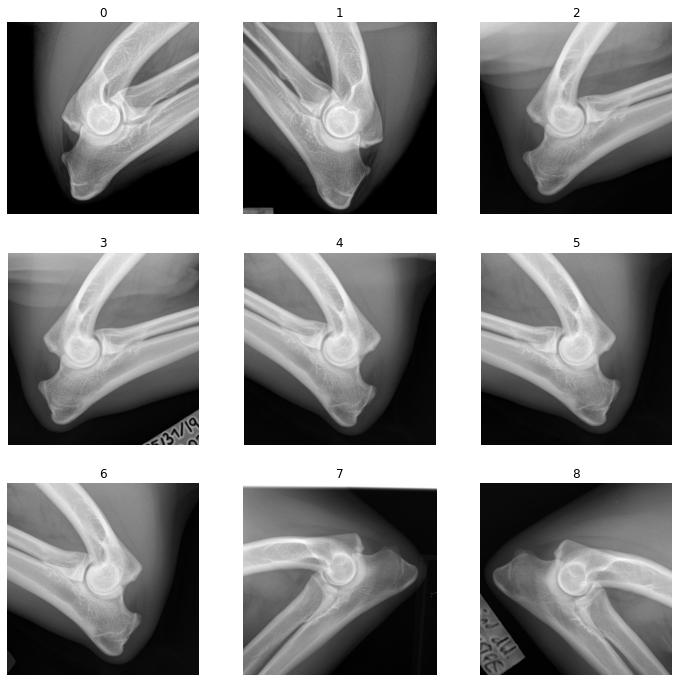

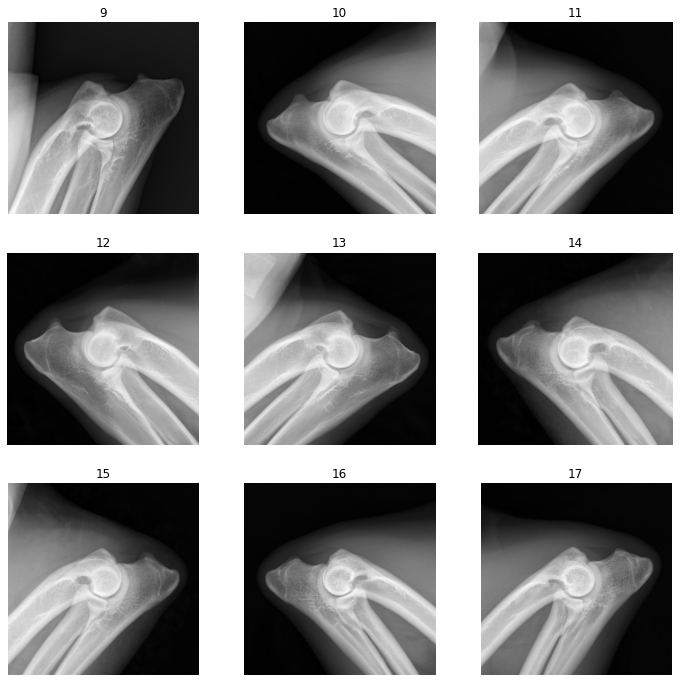

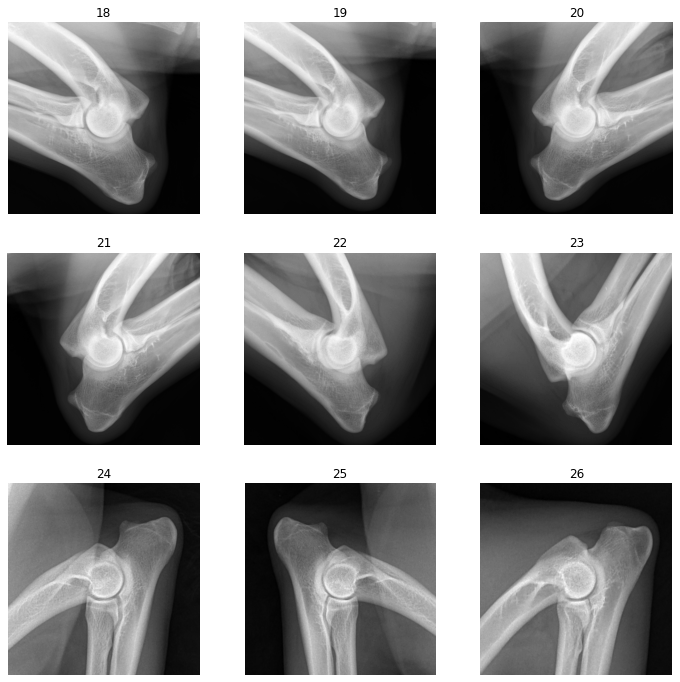

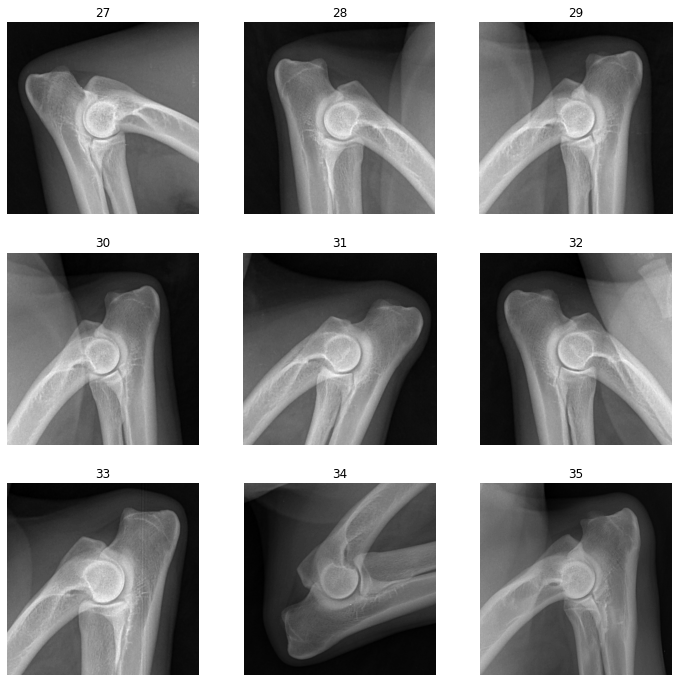

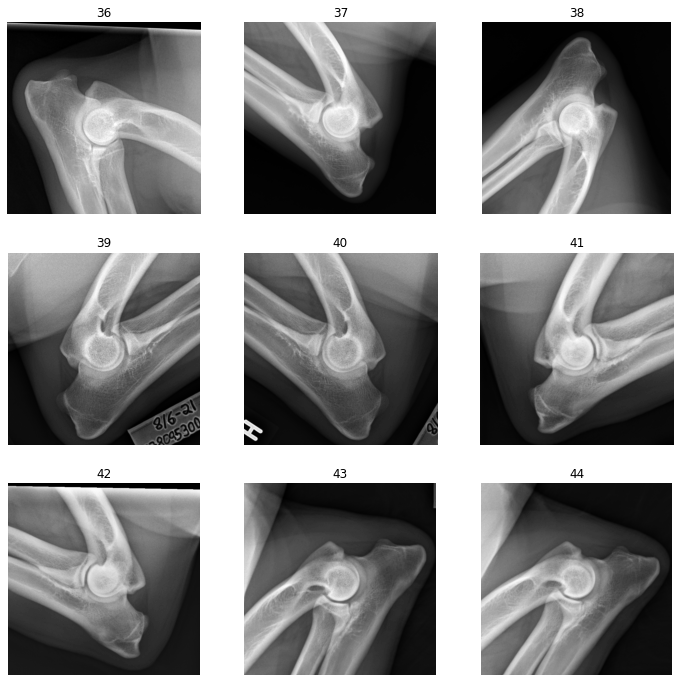

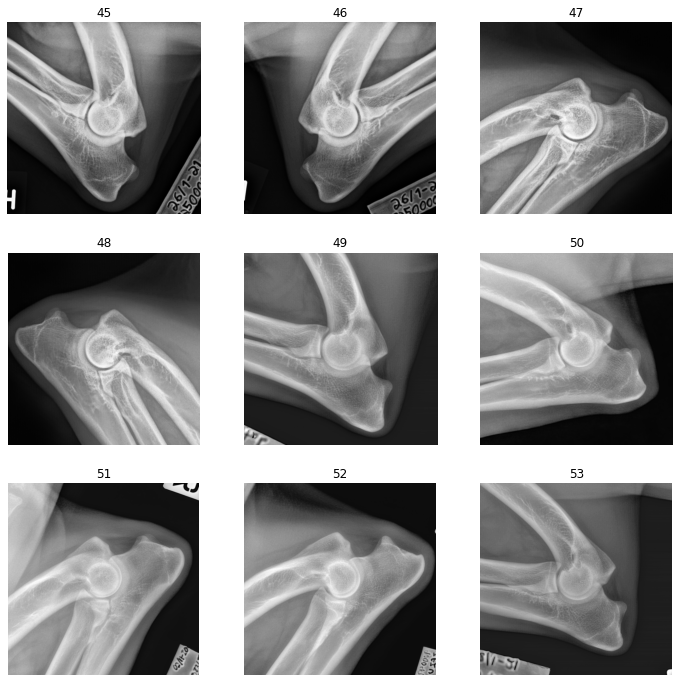

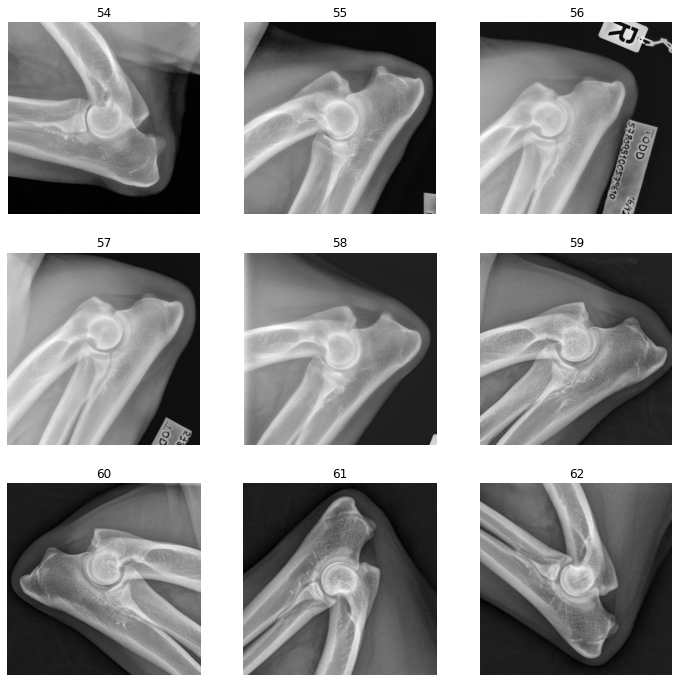

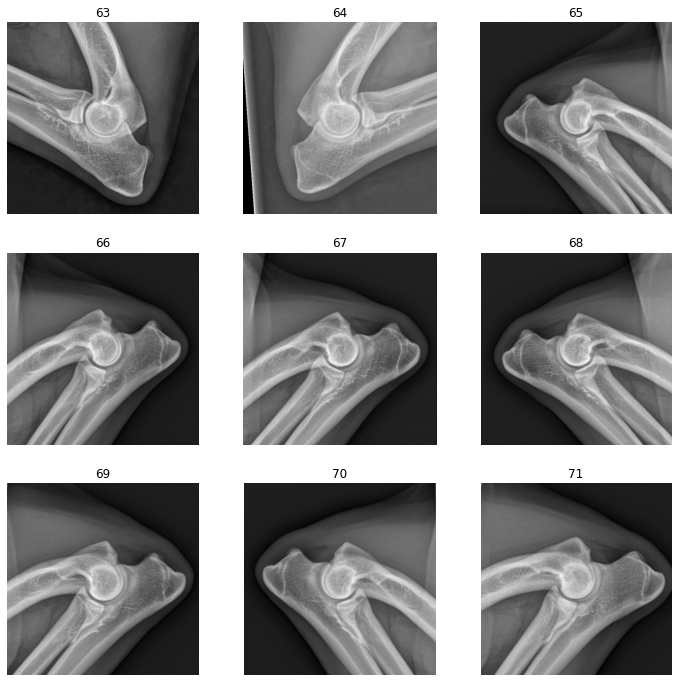

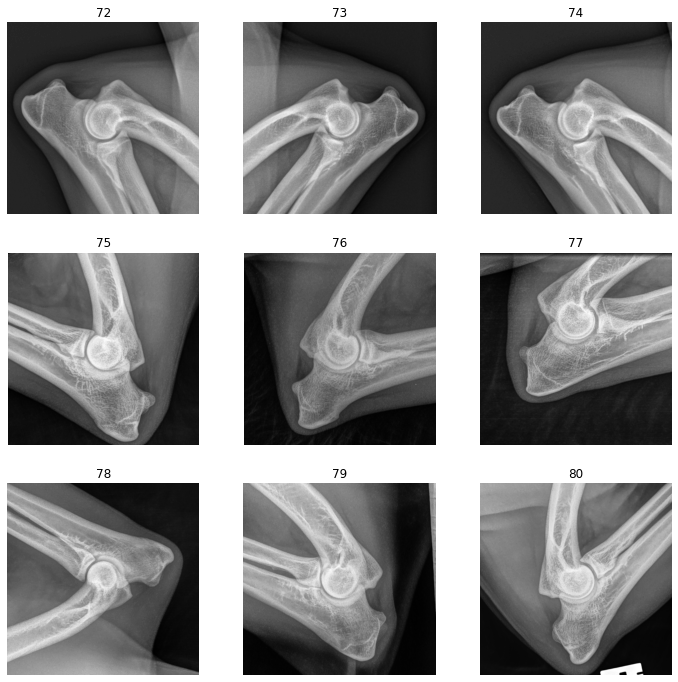

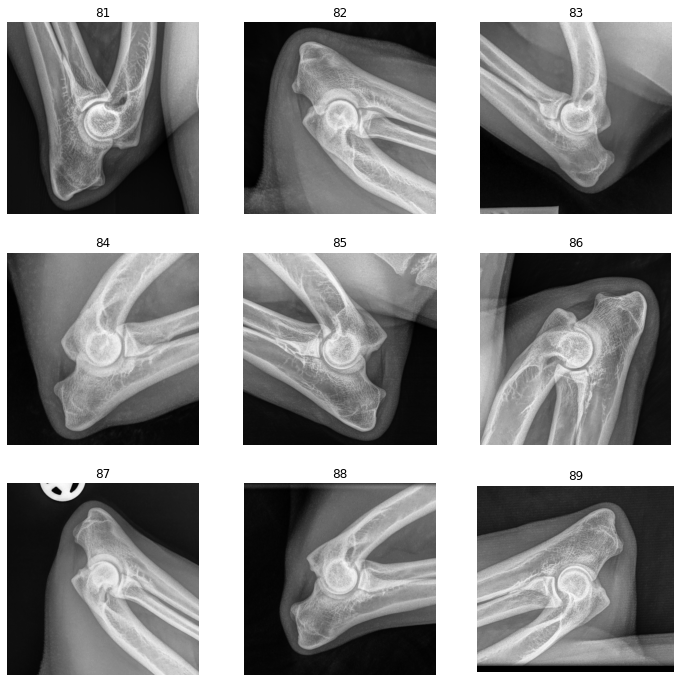

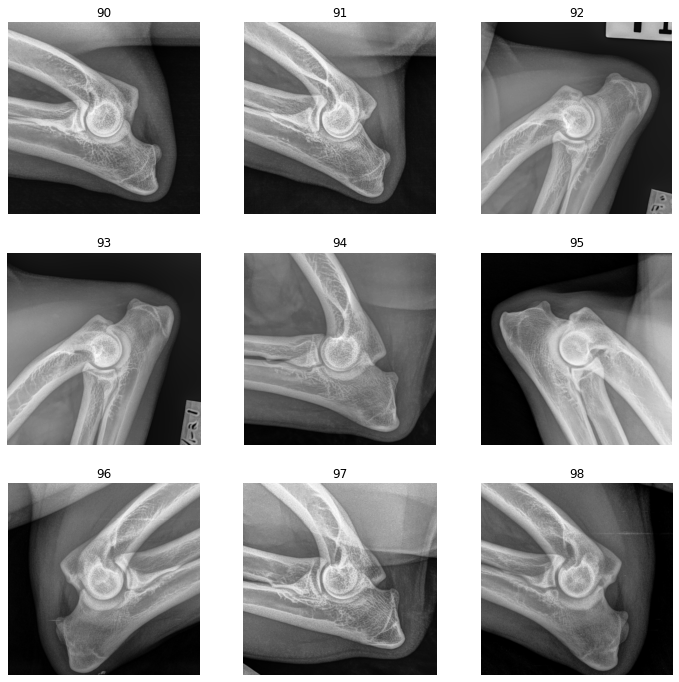

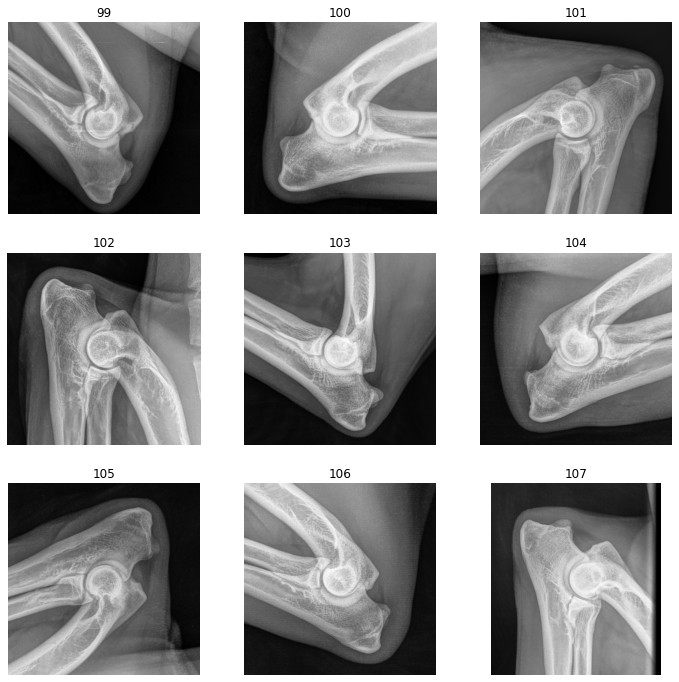

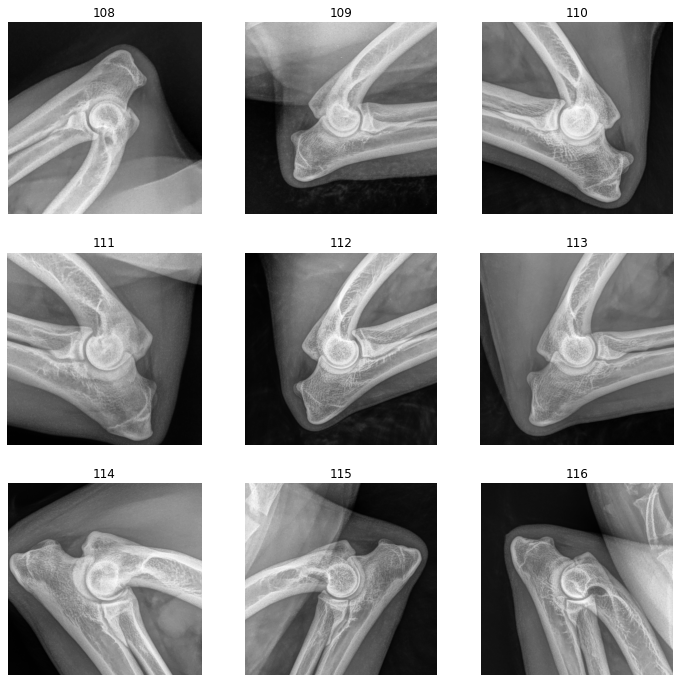

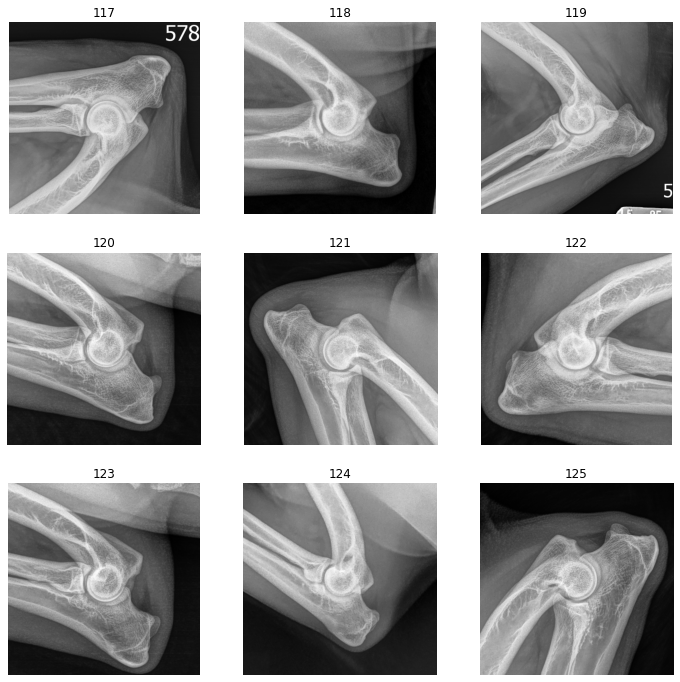

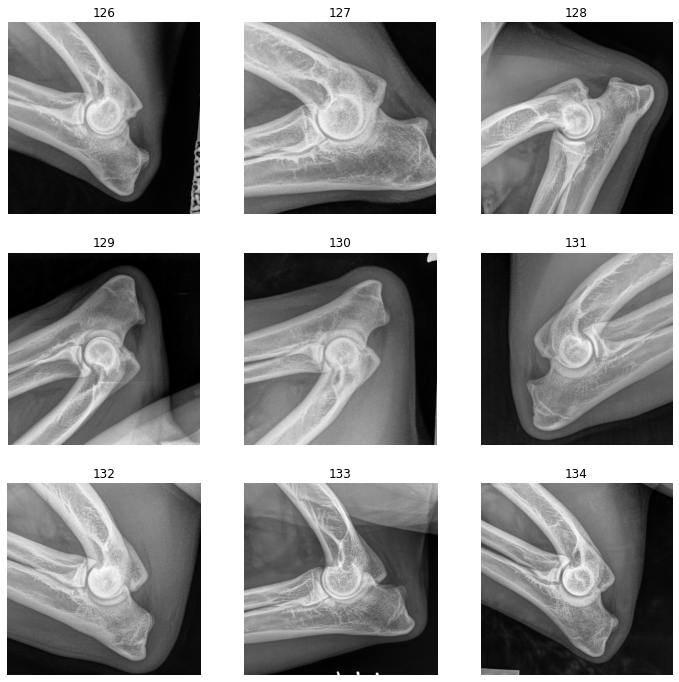

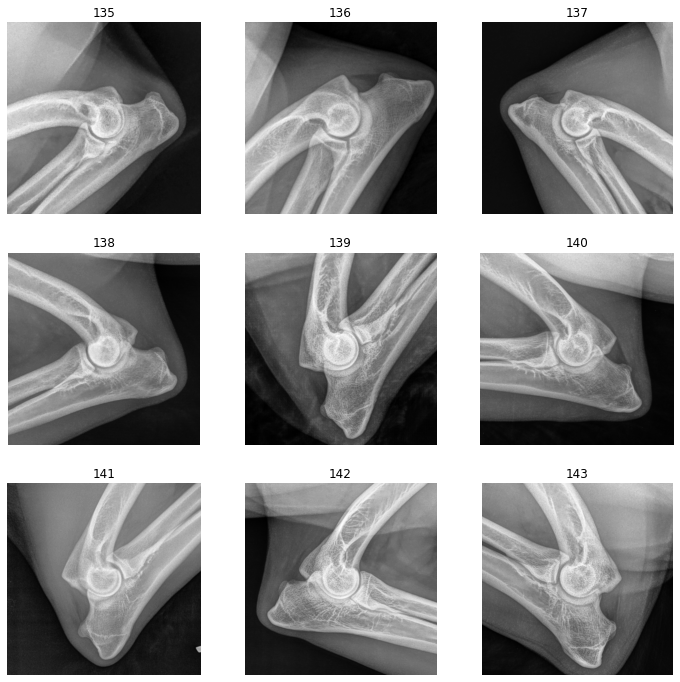

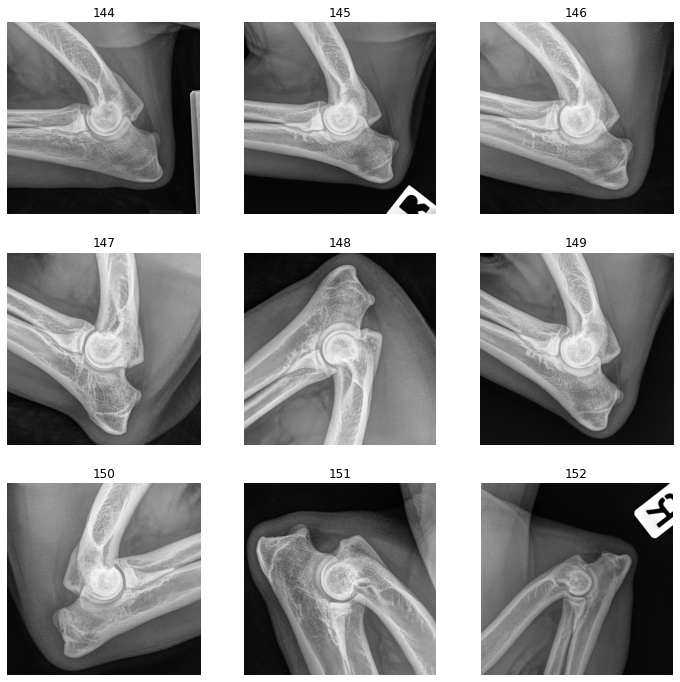

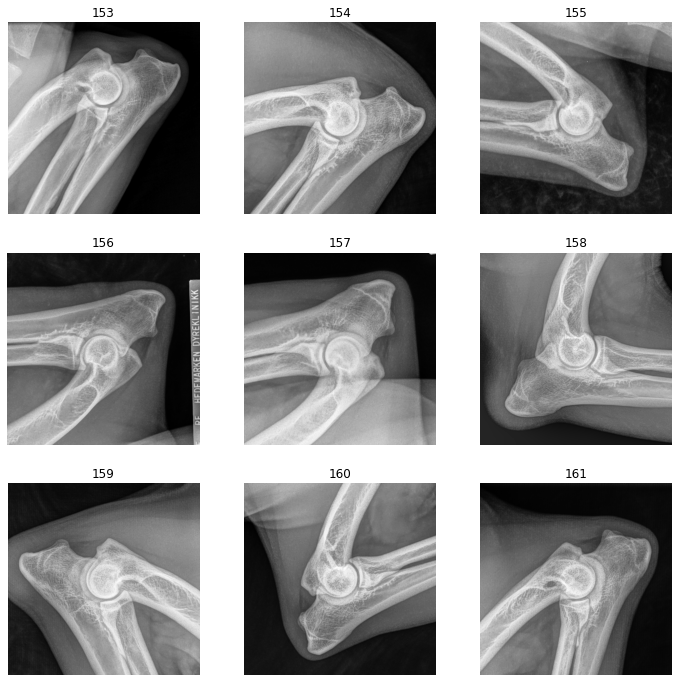

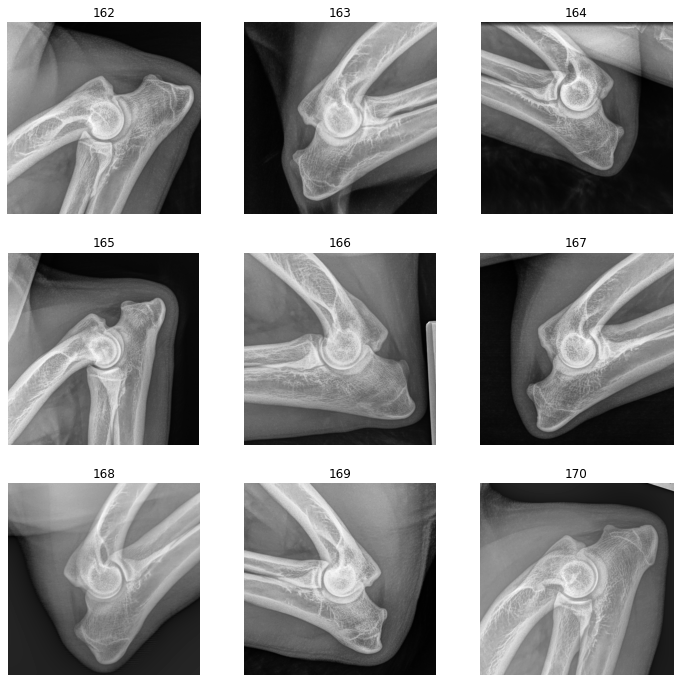

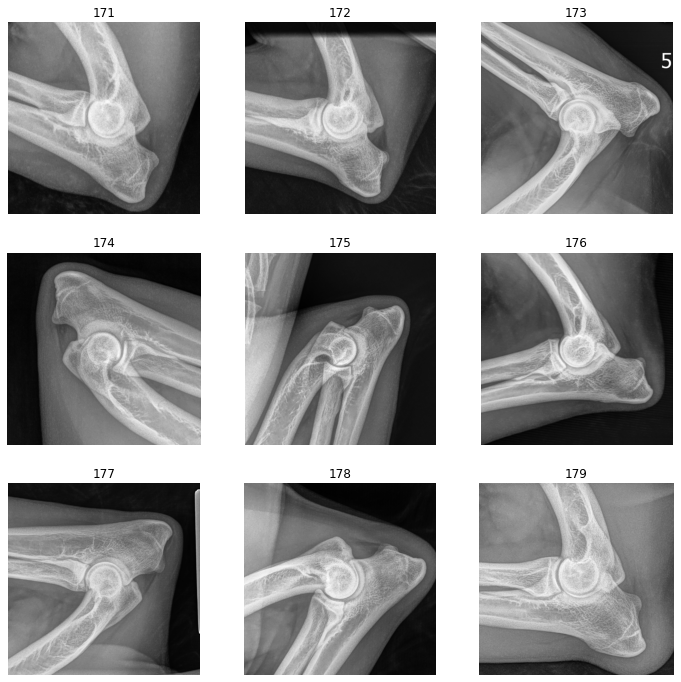

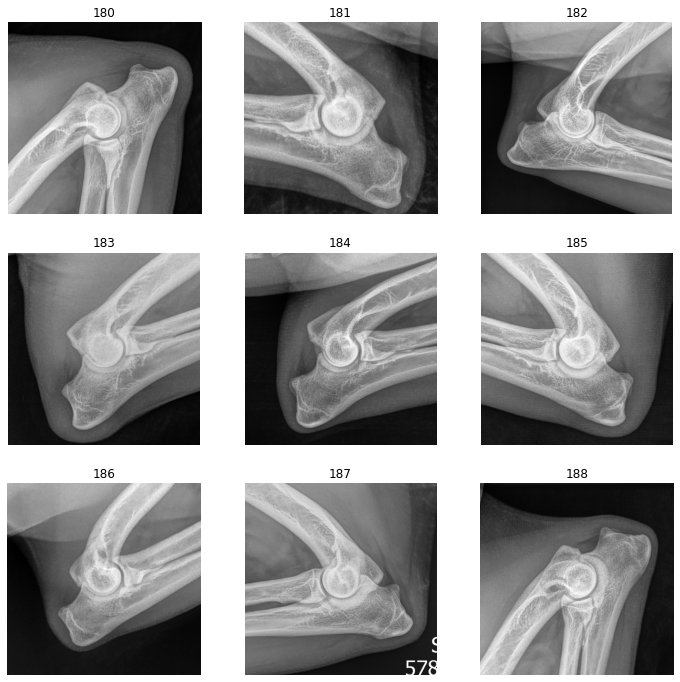

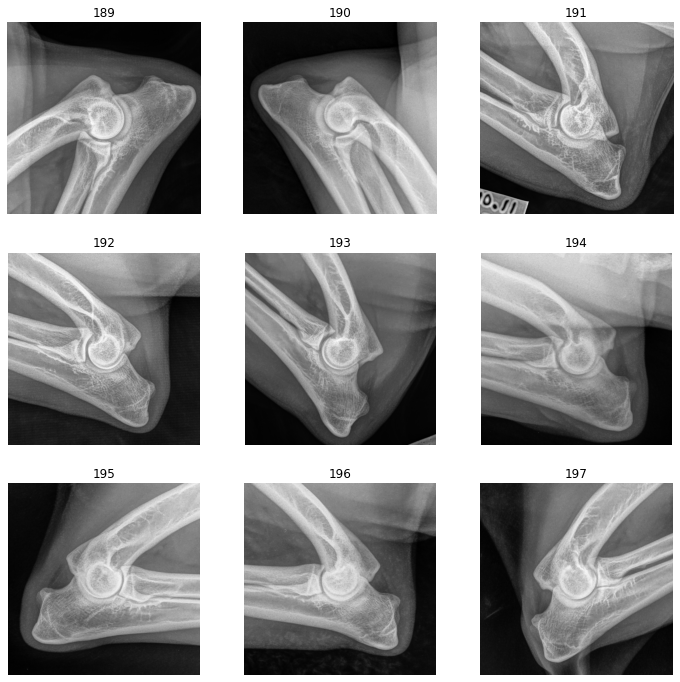

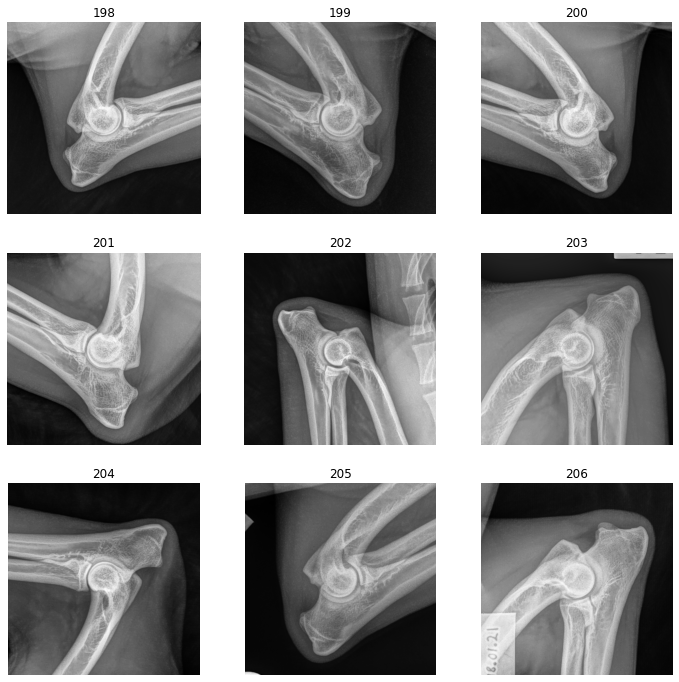

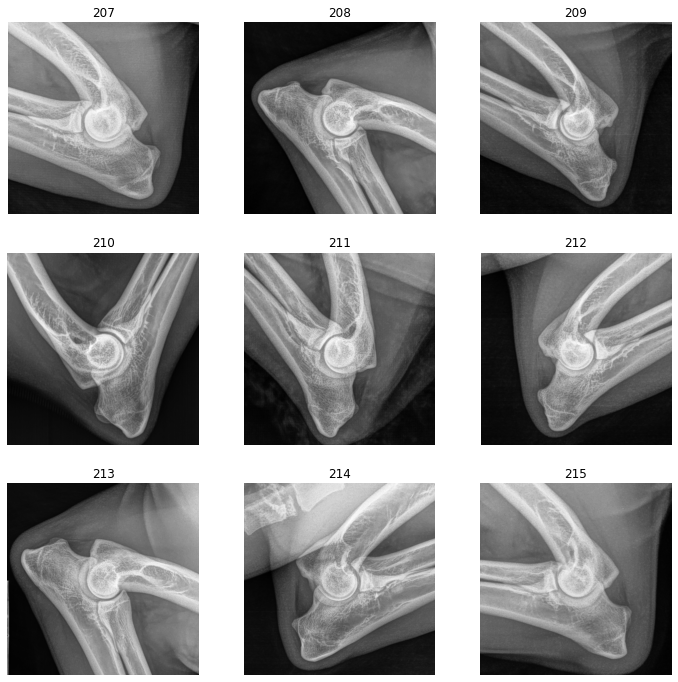

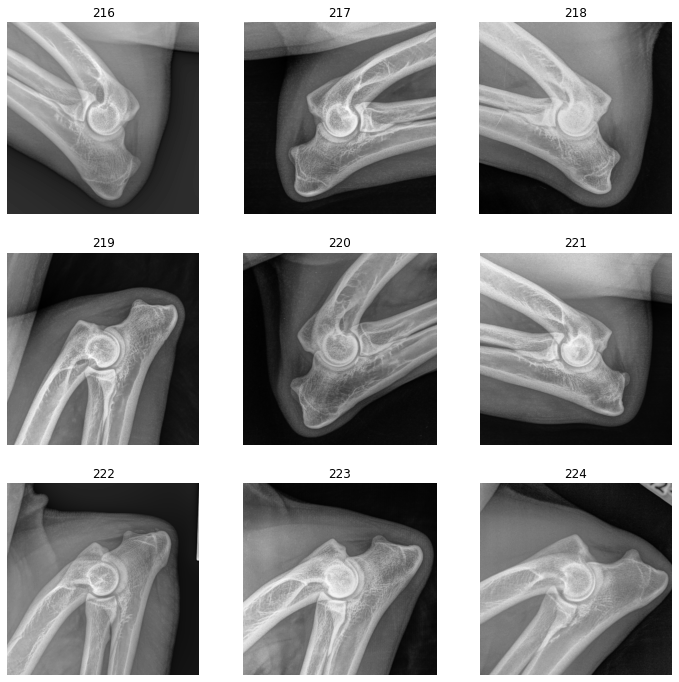

In [12]:
for id, item in detection_df.iterrows():
    fn = item['filename']
    img = np.load(saved_cropped_image + '/' + fn + '.npy')
    plt.subplot(3,3, (id%9) + 1)
    plt.imshow(img, 'gray')
    plt.axis('off')
    plt.title(str(id))
    
    if (id%9) == 8:
        plt.show()
        
plt.show()

## Remove bad detection items

In [13]:
detection_df.to_csv(filename_clean, index=False)